In [27]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [70]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
# Assignment 2.
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\2258733550.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\2258733550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [29]:
#Part 1
# To calculate GDP per capita.
dfLE['GDP_per_capita'] = dfLE['GDP'] / dfLE['Population']

# To print the labels along with just that column.
print("GDP_per_capita column:")
print(dfLE[['Country', 'GDP_per_capita']].head())

# To print random rows of that data.
print("\n10 random rows of GDP per capita data:")
print(dfLE[['Country', 'GDP_per_capita']].sample(10, random_state=42))



GDP_per_capita column:
             Country  GDP_per_capita
0        Afghanistan      414.824126
1            Albania     1674.441147
2            Algeria     3392.912329
3             Angola     2146.263722
4  AntiguaandBarbuda             NaN

10 random rows of GDP per capita data:
        Country  GDP_per_capita
152   Singapore             NaN
75      Iceland    33467.123454
158  SouthSudan      511.630928
66       Greece    24099.375234
60       France    27857.422247
15      Belgium     7893.231084
9    Azerbaijan     3091.580405
16       Belize     4243.835642
128      Panama     7084.512422
125        Oman             NaN


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

--- Generating Density and Cumulative Distributions for All Numerical Columns ---


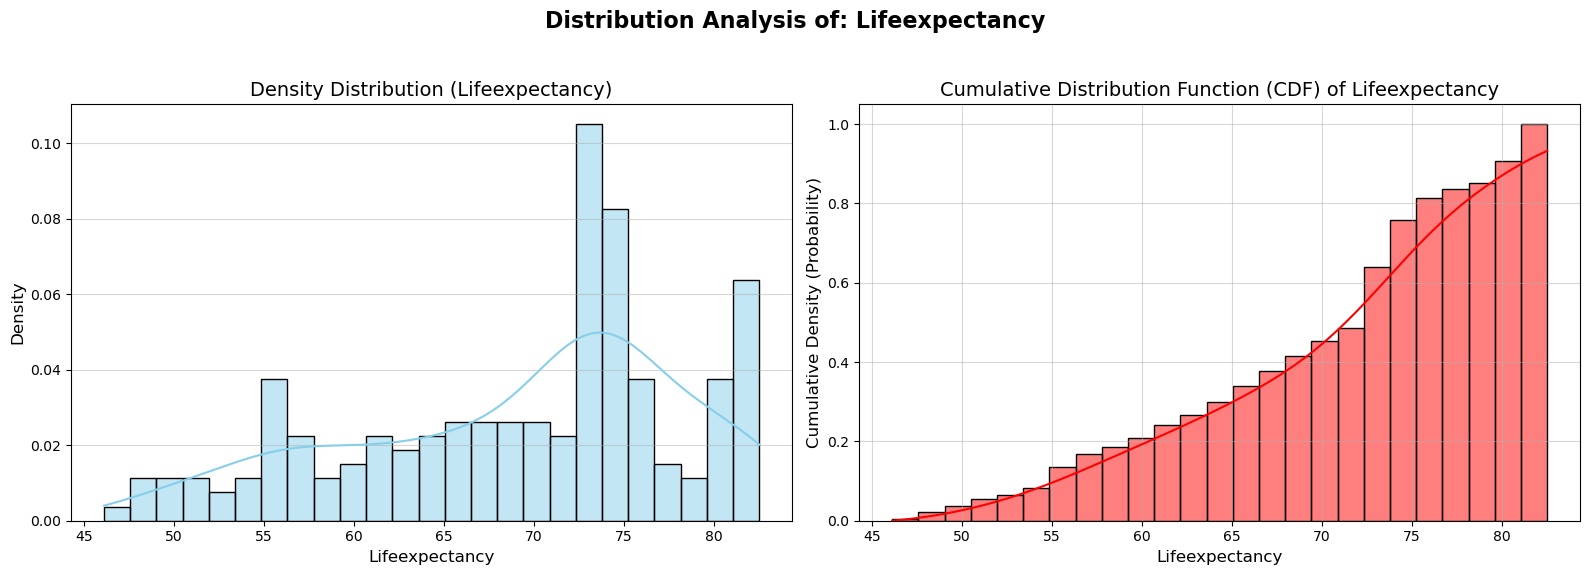

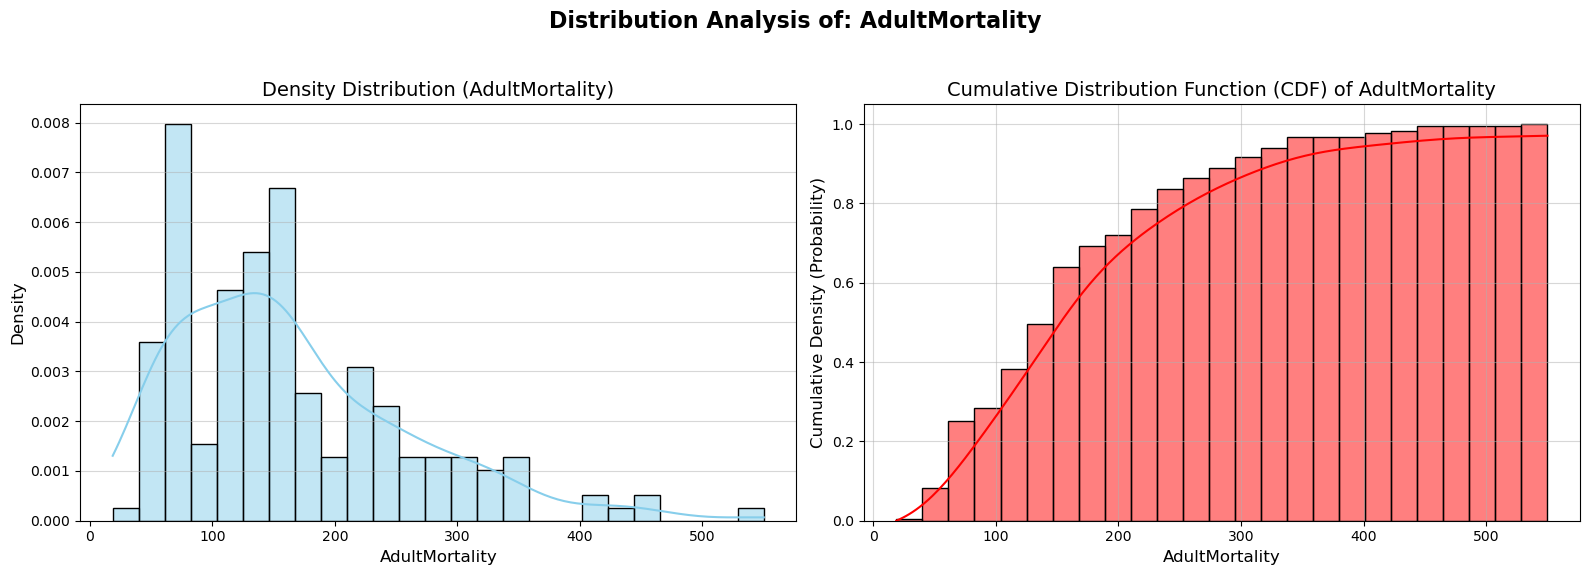

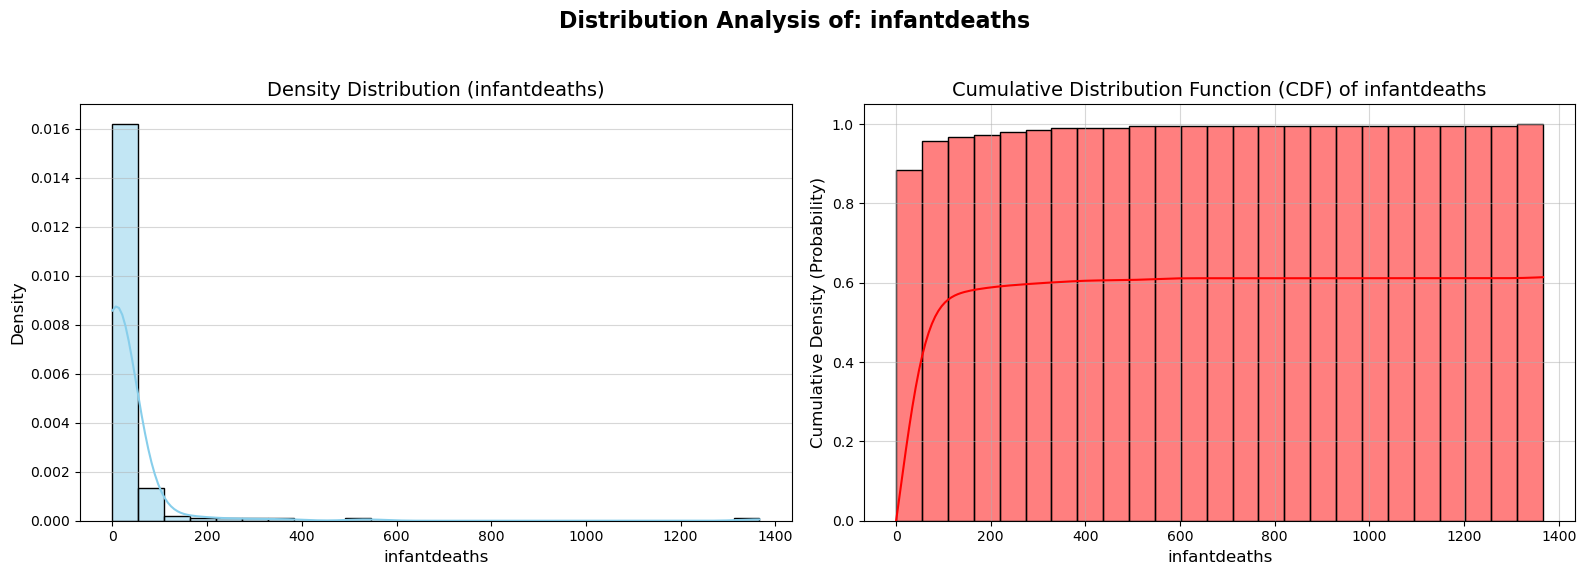

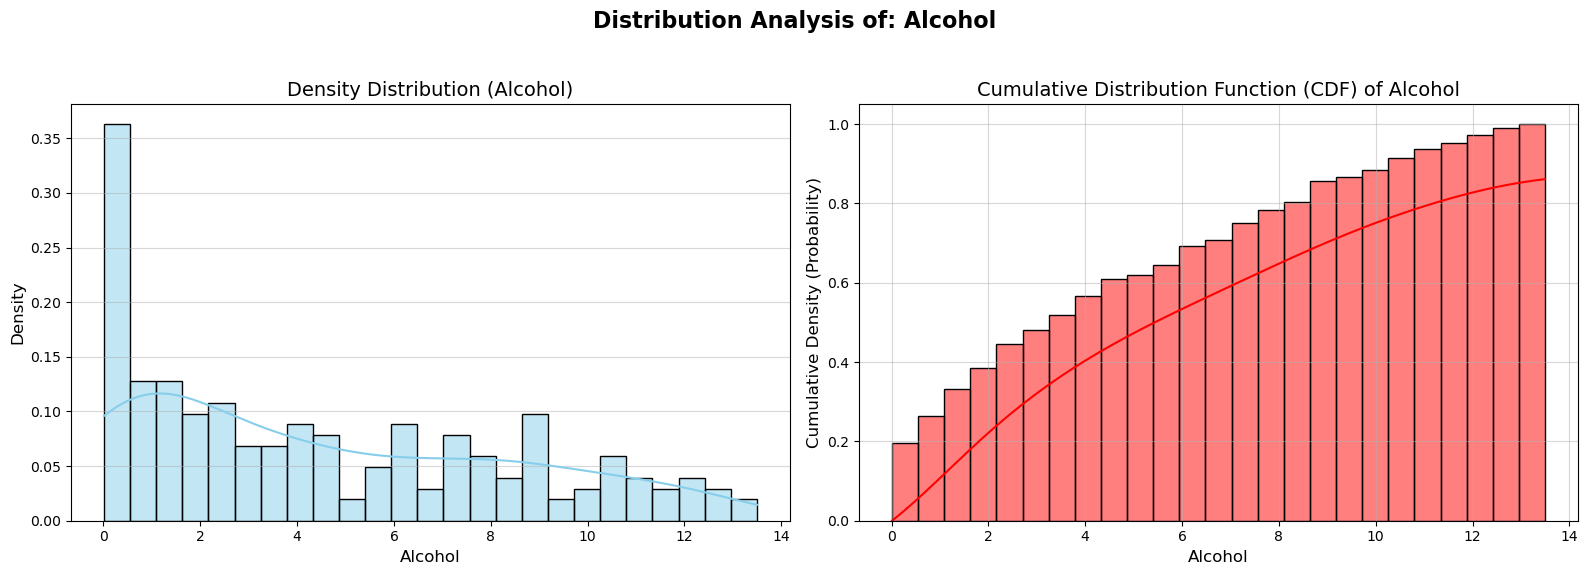

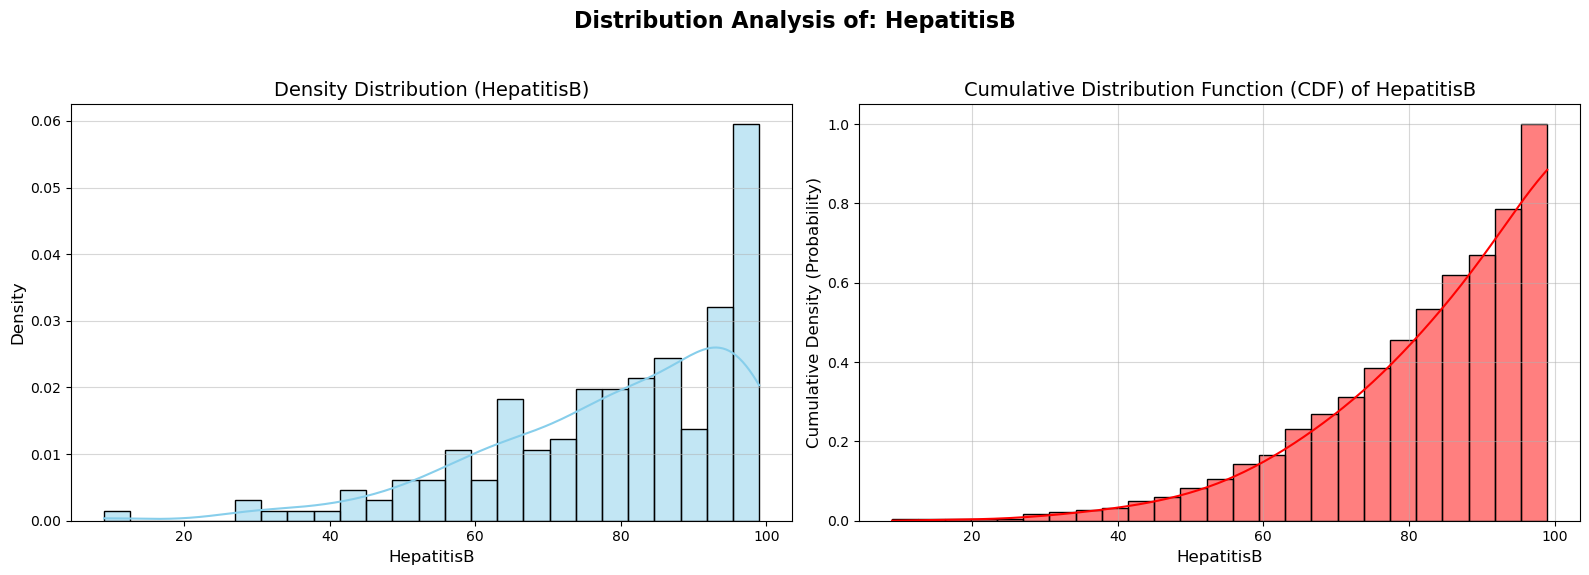

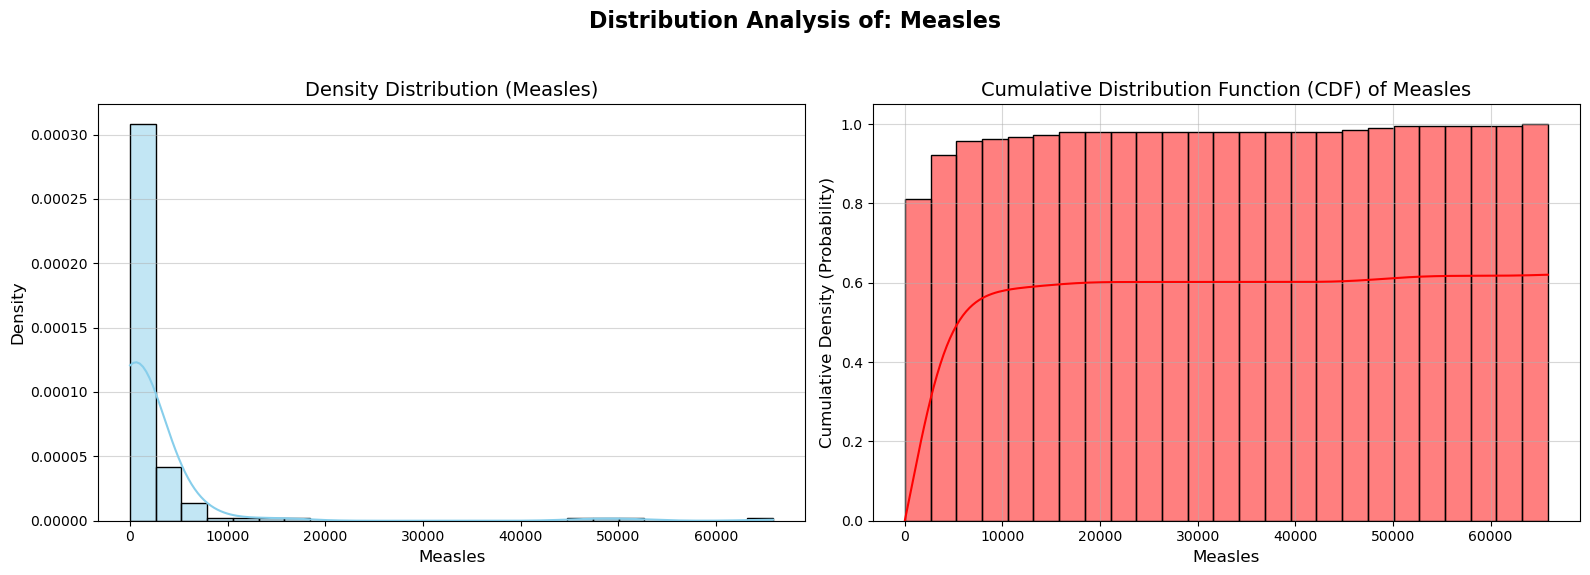

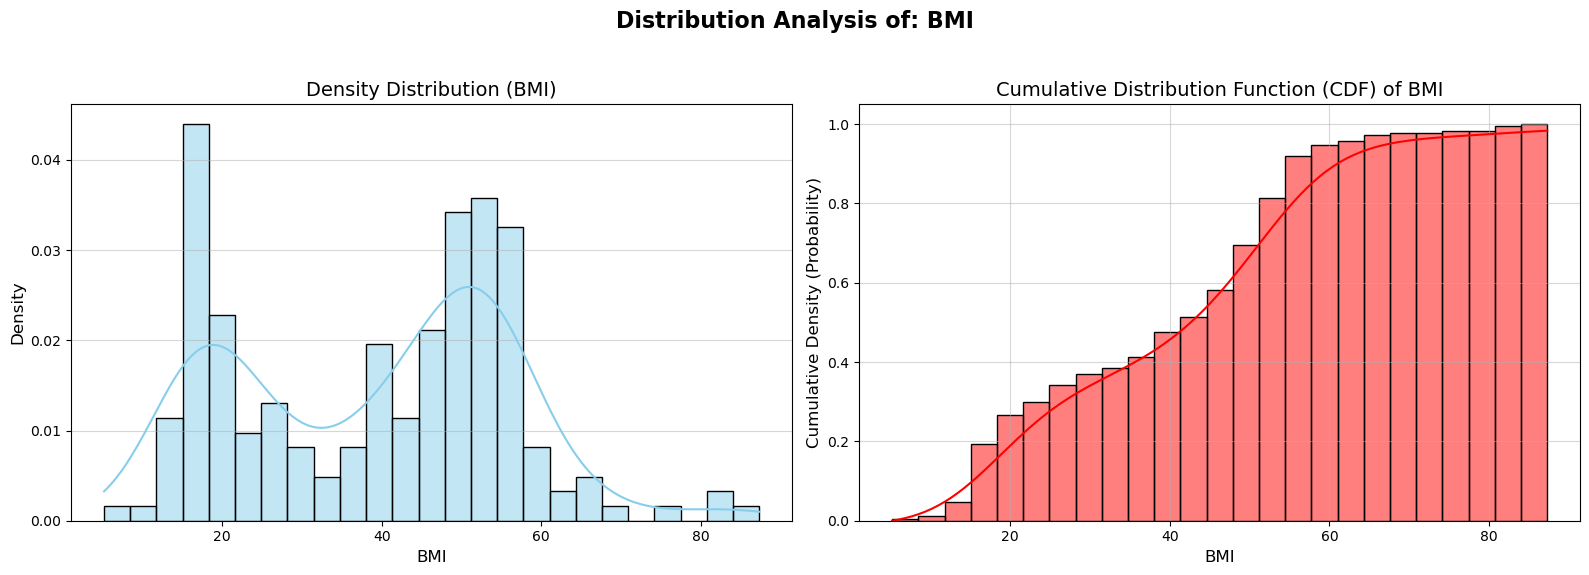

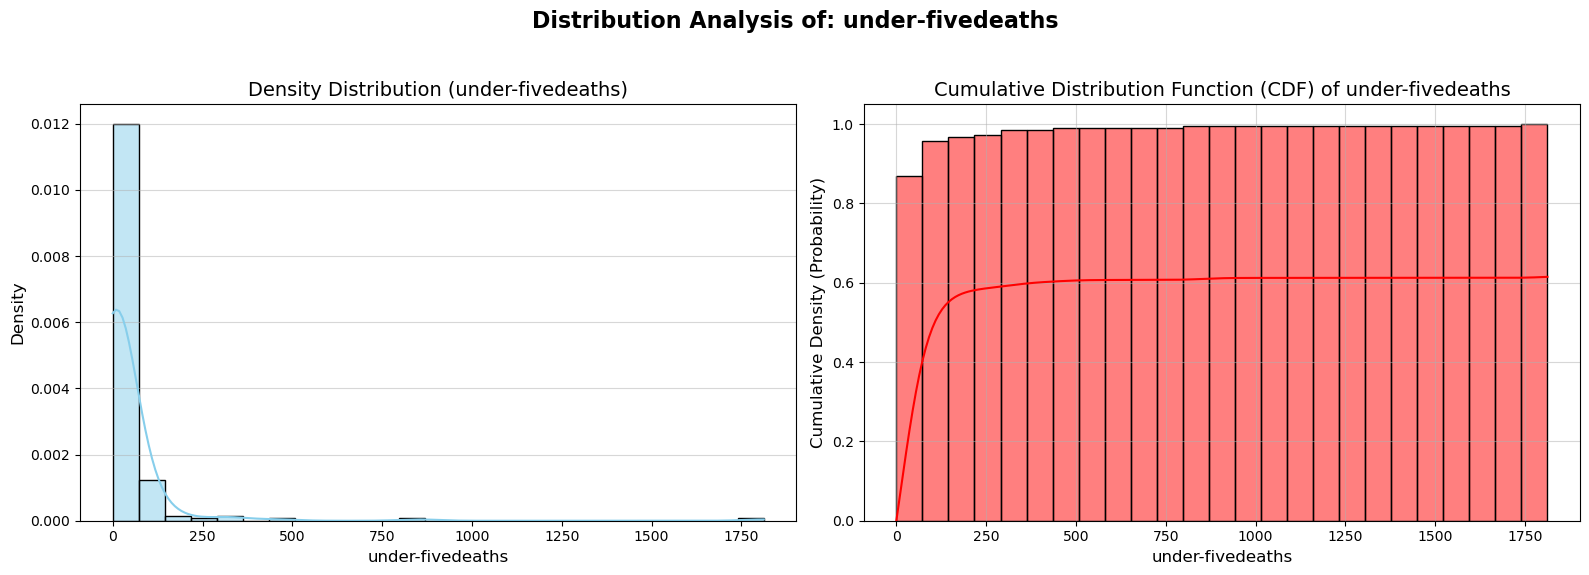

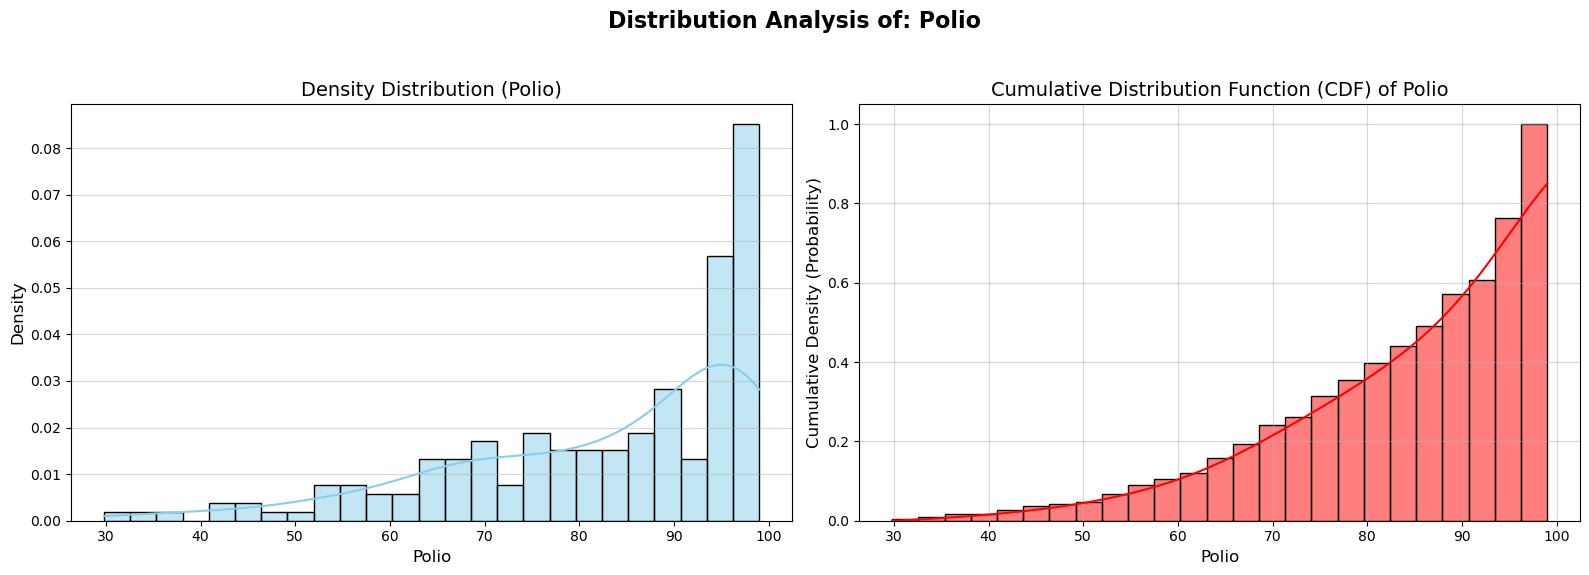

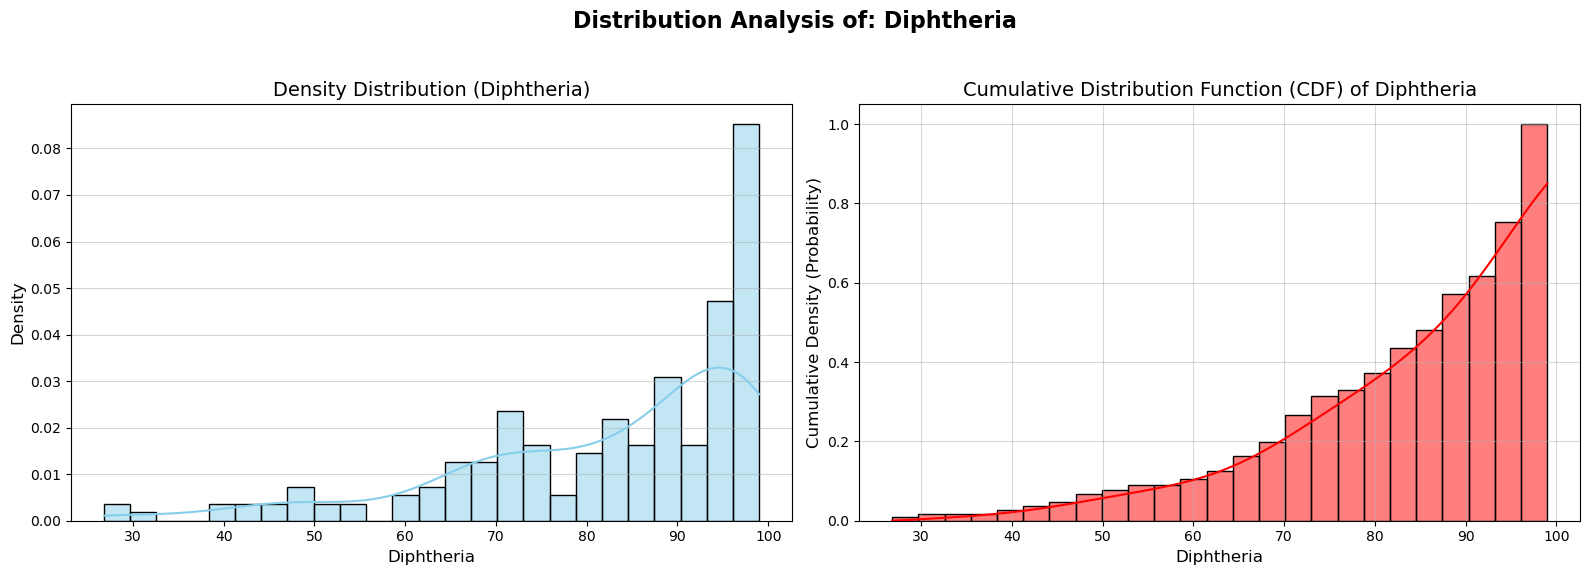

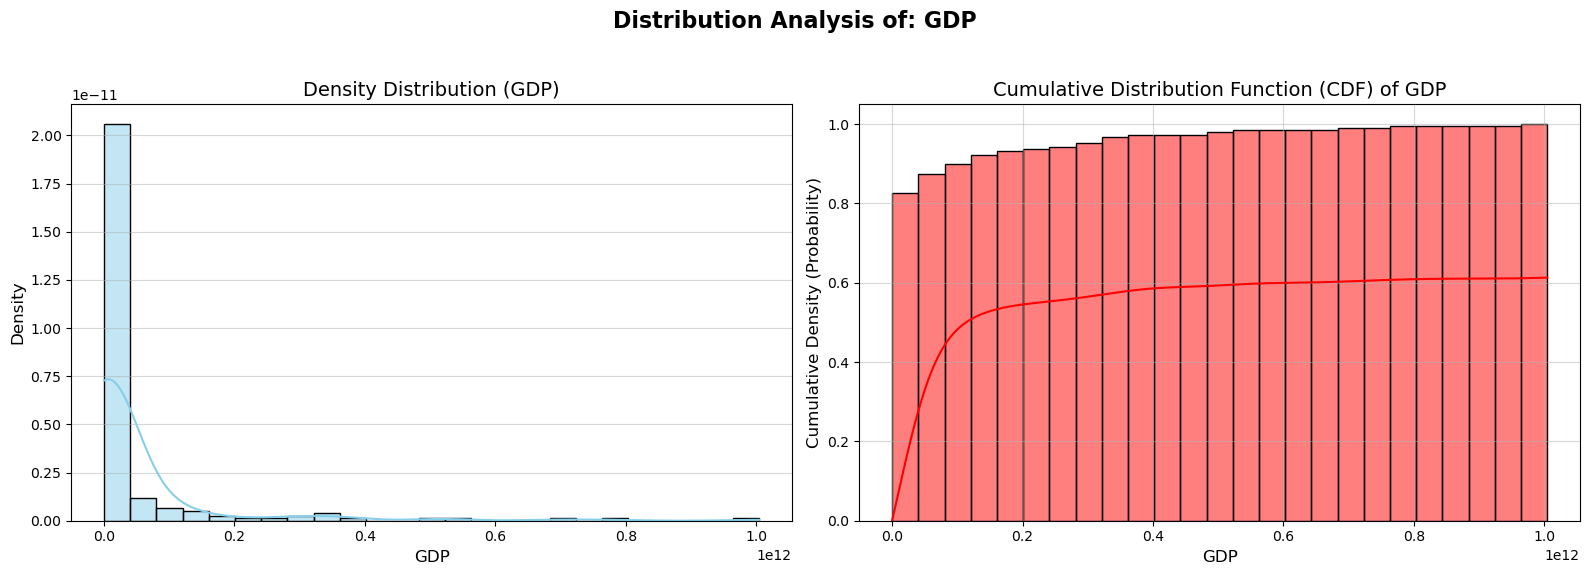

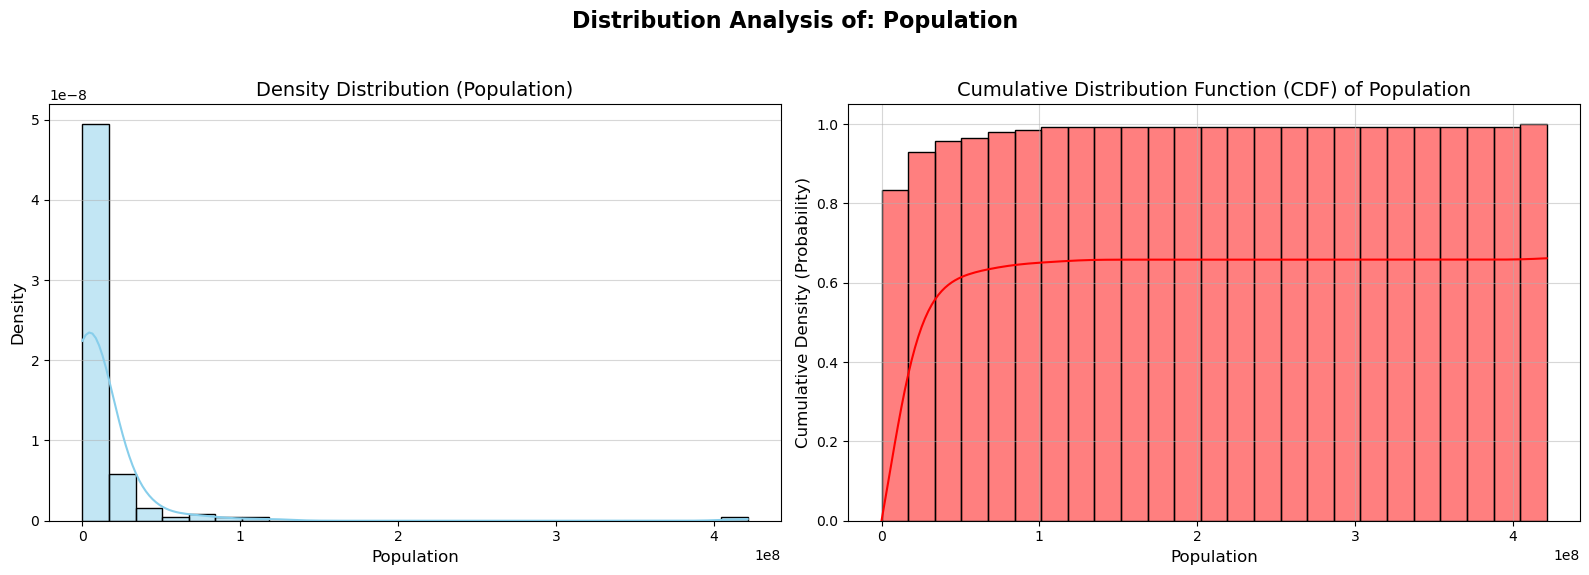

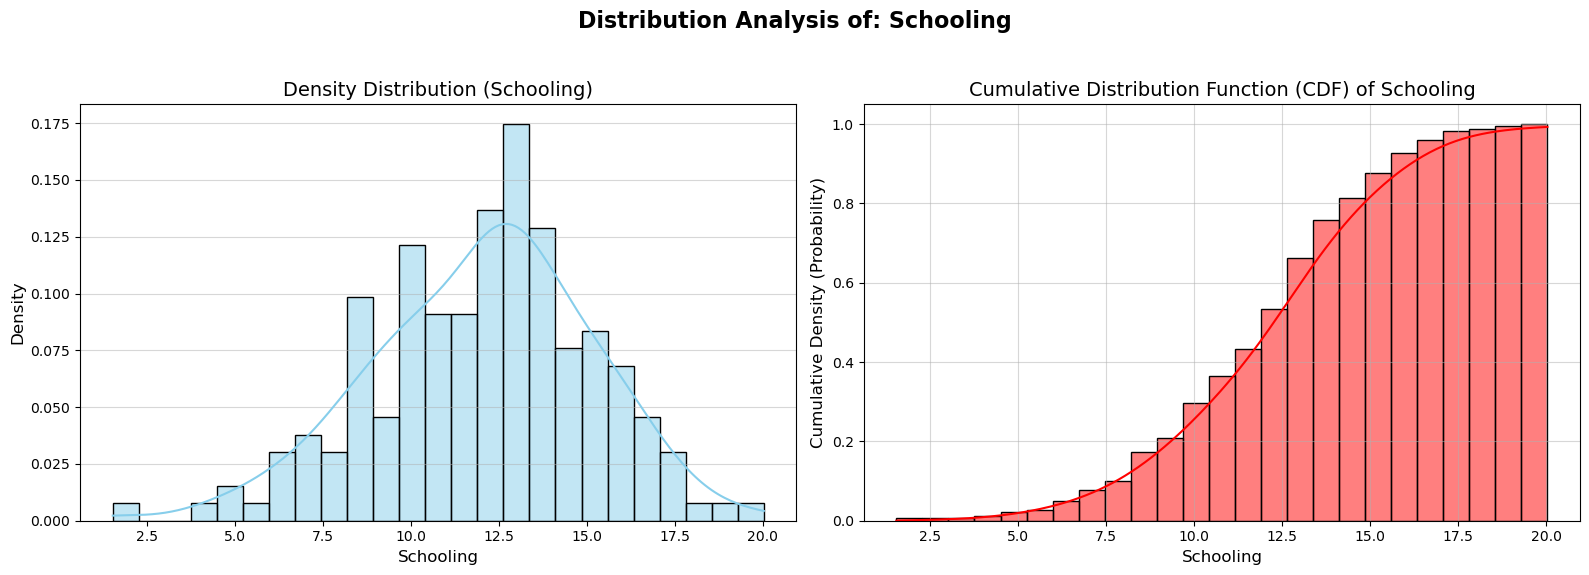

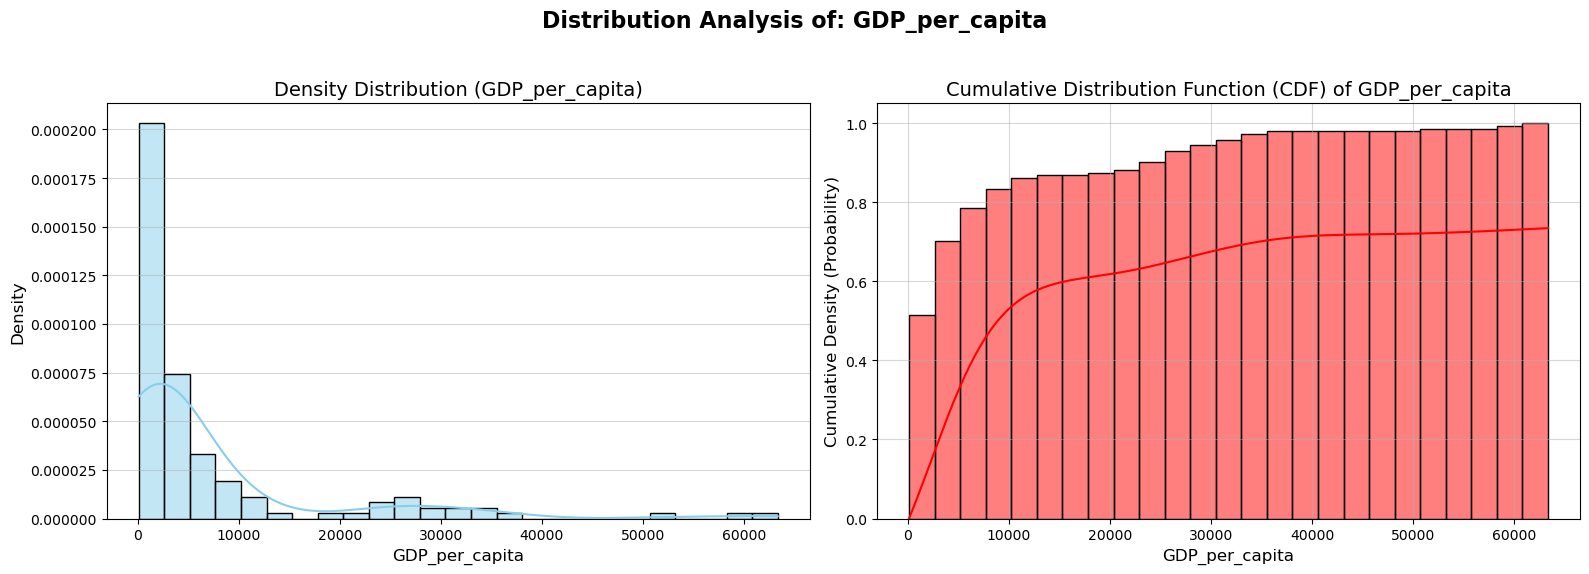

--- Visualization Complete ---


In [ ]:
# Identify all numerical columns (excluding 'Country')
cols_to_plot = [col for col in dfLE.select_dtypes(include=np.number).columns if col != 'isDeveloped']

print("Generating Density and Cumulative Distributions for All Numerical Columns")

# To efficiently loop through all columns and generate visualizations
for col in cols_to_plot:
    # Set up a figure with 1 row and 2 columns for a clean side-by-side layout
    f, axes = plt.subplots(1, 2, figsize=(16, 6))
    f.suptitle(f'Distribution Analysis of: {col}', fontsize=16, fontweight='bold')

    # Plot 1: Regular Distribution (Density)
    sns.histplot(
        data=dfLE,
        x=col,
        kde=True,
        ax=axes[0],
        stat="density", # Normalizes the histogram area to 1
        bins=25,
        color='skyblue',
        edgecolor='black'
    )
    axes[0].set_title(f'Density Distribution ({col})', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Density', fontsize=12)
    axes[0].grid(axis='y', alpha=0.5)

    # Plot 2: Cumulative Distribution Function (CDF)
    sns.histplot(
        data=dfLE,
        x=col,
        kde=True,
        ax=axes[1],
        cumulative=True, # is true for cumulative
        stat="density",
        bins=25,
        color="red",
        edgecolor='black'
    )
    axes[1].set_title(f'Cumulative Distribution Function (CDF) of {col}', fontsize=14)
    axes[1].set_xlabel(col, fontsize=12)
    axes[1].set_ylabel('Cumulative Density (Probability)', fontsize=12)
    axes[1].grid(axis='both', alpha=0.5)

    # To show the visualization
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust to make room for suptitle
    plt.show()

print(" Visualization Complete")

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

--- Analytical Distribution for Schooling ---
Distribution: Skew Normal (a=0.3, loc=12.03, scale=3.10)


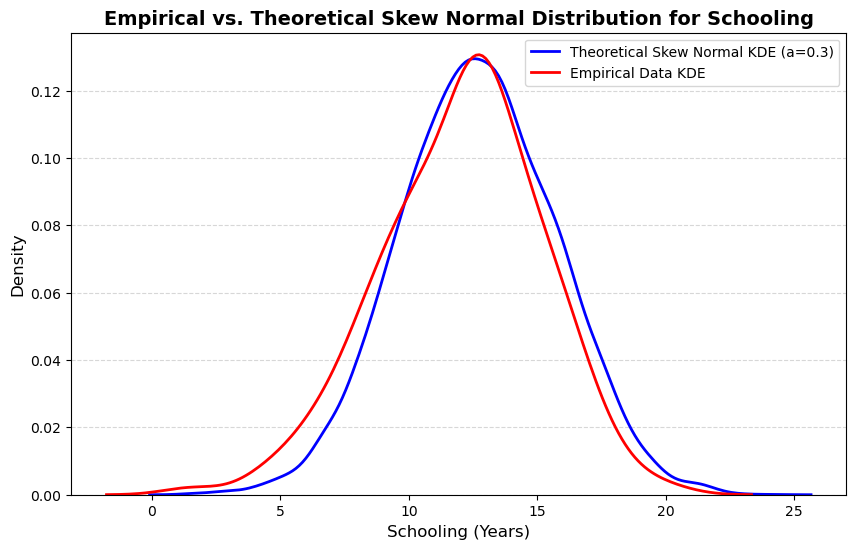


--- Prediction using Skew Normal Distribution ---
Canada's Schooling: 15.88 years
Prediction Range: 14.88 to 16.88 years
Predicted Percentage of Countries in this range: 15.40%


In [ ]:

print(" Analytical Distribution for Schooling")

# Calculate parameters (loc and scale) from the empirical data
mu_schooling = dfLE["Schooling"].mean()
sigma_schooling = dfLE["Schooling"].std()
skewness_a = 0.3 

print(f"Distribution: Skew Normal (a={skewness_a}, loc={mu_schooling:.2f}, scale={sigma_schooling:.2f})") #The data represents means (averages) aggregated by country, and the distribution of averages tends toward a bell curve.

# 1. To create and Visualize the Distribution 
# Generate 10,000 random samples from the theoretical Skew Normal distribution
aSchool = ss.skewnorm.rvs(
    a=skewness_a,
    loc=mu_schooling,
    scale=sigma_schooling,
    size=10000
)

# Plot the KDEs for comparison
plt.figure(figsize=(10, 6))
plt.title('Empirical vs. Theoretical Skew Normal Distribution for Schooling', fontsize=14, fontweight='bold')
plt.xlabel('Schooling (Years)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Theoretical Skew Normal Distribution KDE
sns.kdeplot(aSchool, label=f'Theoretical Skew Normal KDE (a={skewness_a})', color="blue", linewidth=2)

# Empirical Data Distribution KDE (Your code line, enhanced with a label)
sns.kdeplot(dfLE.Schooling, label='Empirical Data KDE', color="red", linewidth=2)

plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()


# 2. Prediction
# Predict the percentage of countries within 1 year of Canada's schooling level.

# Get Canada's schooling value
# Assuming 'Canada' exists in the 'Country' column after grouping
canada_schooling = dfLE[dfLE['Country'] == 'Canada']['Schooling'].iloc[0]

# Define the prediction range (within 1 year)
x1_lower = canada_schooling - 1
x2_upper = canada_schooling + 1

# Use the analytical Skew Normal CDF (ss.skewnorm.cdf) for prediction
# P(x1 < X < x2) = CDF(x2) - CDF(x1)
prob_upper = ss.skewnorm.cdf(x2_upper, a=skewness_a, loc=mu_schooling, scale=sigma_schooling)
prob_lower = ss.skewnorm.cdf(x1_lower, a=skewness_a, loc=mu_schooling, scale=sigma_schooling)

predicted_percentage = (prob_upper - prob_lower) * 100

print(f"\n--- Prediction using Skew Normal Distribution ---")
print(f"Canada's Schooling: {canada_schooling:.2f} years")
print(f"Prediction Range: {x1_lower:.2f} to {x2_upper:.2f} years")
print(f"Predicted Percentage of Countries in this range: {predicted_percentage:.2f}%")

### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>


ANALYTICAL DISTRIBUTION FOR GDP PER CAPITA
Distribution Choice: Log-Normal Distribution
GDP per capita data: 144 countries with valid positive data
Log(GDP per capita) Statistics:
  Mean of log(GDP): 7.80
  Std of log(GDP): 1.47
  Original GDP - Min: $117.47, Max: $63337.61


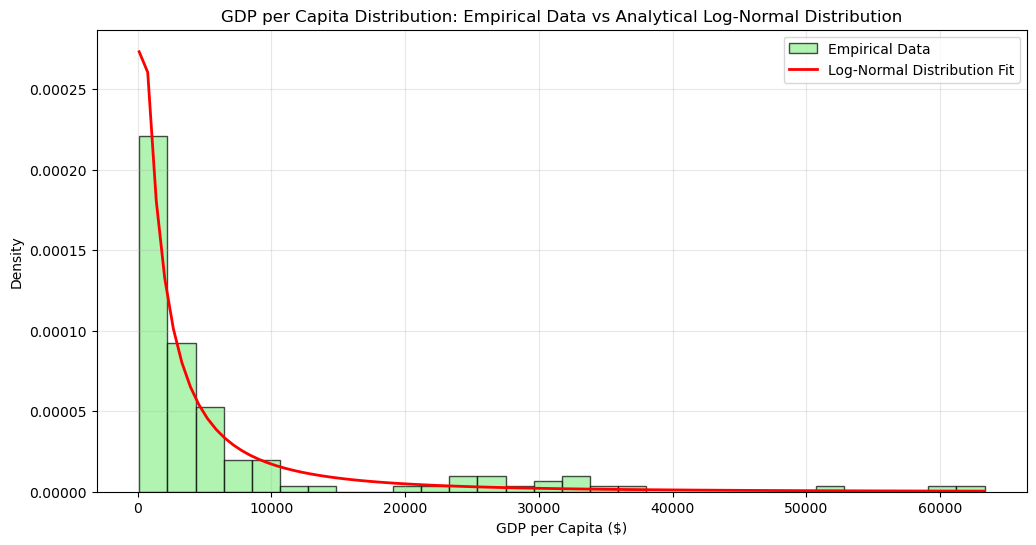

In [41]:
#Analytical for GDP/capita

print("\nANALYTICAL DISTRIBUTION FOR GDP PER CAPITA")

print("Distribution Choice: Log-Normal Distribution") # Economic variables like income and wealth typically follow log-normal distribution with positive skew.


# Get GDP per capita data.
gdp_data = dfLE['GDP_per_capita'].dropna()  # To remove missing values
gdp_data = gdp_data[gdp_data > 0]  # To remove zeros and negative values
print(f"GDP per capita data: {len(gdp_data)} countries with valid positive data")

# For log-normal distribution, we work with log-transformed data
# If X ~ LogNormal, then log(X) ~ Normal
log_gdp = np.log(gdp_data)

# Calculate parameters for log-normal distribution
# For log-normal, we need the mean and std of the log-transformed data
mu_log = log_gdp.mean()    # Mean of log(GDP)
sigma_log = log_gdp.std()  # Std of log(GDP)

print(f"Log(GDP per capita) Statistics:")
print(f"  Mean of log(GDP): {mu_log:.2f}")
print(f"  Std of log(GDP): {sigma_log:.2f}")
print(f"  Original GDP - Min: ${gdp_data.min():.2f}, Max: ${gdp_data.max():.2f}")

# Create analytical log-normal distribution
# ss.lognorm uses s=σ (shape parameter) and scale=exp(μ)
analytical_gdp = ss.lognorm(s=sigma_log, scale=np.exp(mu_log))
# Plot empirical vs analytical distributions
plt.figure(figsize=(12, 6))

# Plot empirical data
plt.hist(gdp_data, bins=30, density=True, alpha=0.7, 
         color='lightgreen', label='Empirical Data', edgecolor='black')

# Plot analytical PDF
x = np.linspace(gdp_data.min(), gdp_data.max(), 100)
plt.plot(x, analytical_gdp.pdf(x), 'r-', linewidth=2, label='Log-Normal Distribution Fit')

plt.xlabel('GDP per Capita ($)')
plt.ylabel('Density')
plt.title('GDP per Capita Distribution: Empirical Data vs Analytical Log-Normal Distribution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

Initial Pairplot: Visualizing All Correlations (Before Filtering)


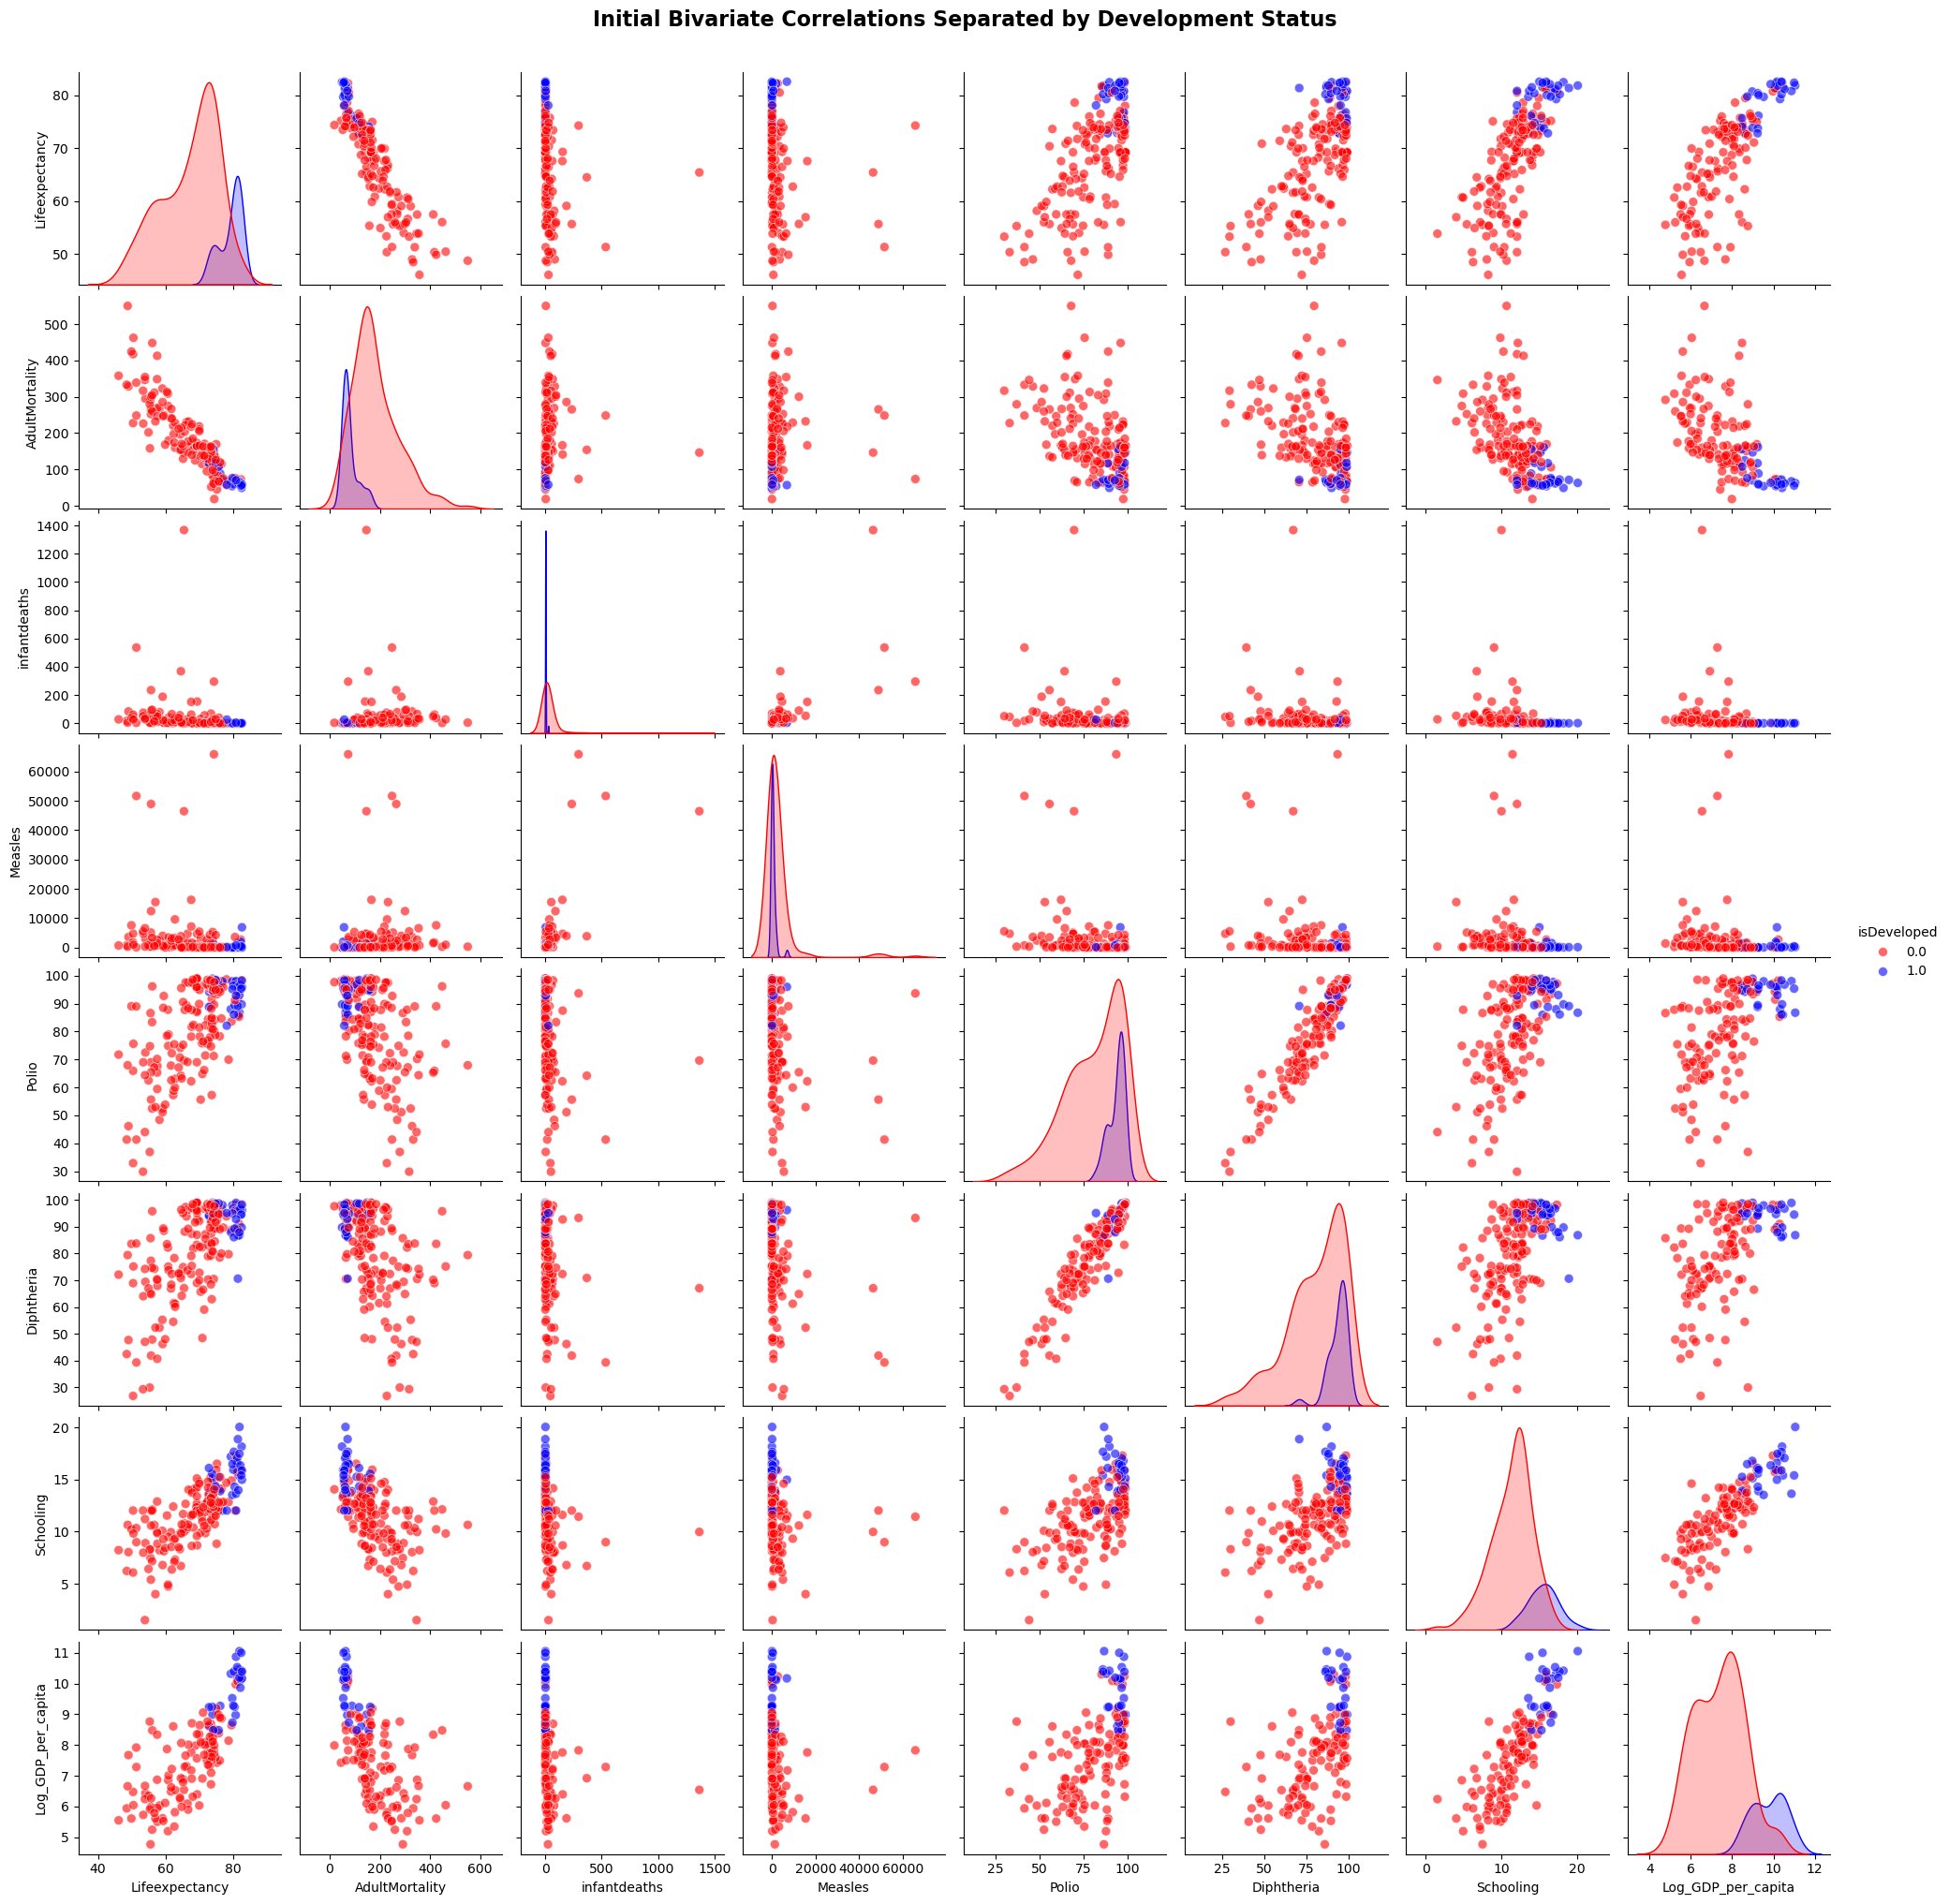

In [66]:
#Visualize correlations. 
# To select the columns for the pairplot (excluding Country, raw GDP/Population)
# Log_GDP_per_capita is used as it's less skewed than raw GDP/Population.
cols_to_correlate = [
    'Lifeexpectancy',
    'AdultMortality',
    'infantdeaths',
    'Measles',
    'Polio',
    'Diphtheria',
    'Schooling',
    'Log_GDP_per_capita'
]

print("Initial Pairplot: Visualizing All Correlations (Before Filtering)")

# Create the pairplot, separating by 'isDeveloped' status
sns.pairplot(
    dfLE,
    vars=cols_to_correlate,
    hue='isDeveloped',
    diag_kind='kde', # Show the density distribution on the diagonal
    palette={1:'blue', 0: 'red'}, # Blue for Developed (1), Red for Developing (0)
    plot_kws={'alpha': 0.6, 's': 50}
)
plt.suptitle('Initial Bivariate Correlations Separated by Development Status', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [67]:

# Create a copy of the DataFrame for filtering
dfLE_filtered = dfLE.copy()

# List of columns to apply the IQR filter to
outlier_cols = ['infantdeaths', 'Measles', 'AdultMortality']

print("\n Outlier Filtering Summary (1.5 * IQR Rule)")
print("Justification: Removing real, extreme values that confound correlations for the majority.")
print("-" * 65)

for col in outlier_cols:
    Q1 = dfLE_filtered[col].quantile(0.25)
    Q3 = dfLE_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR

    # Count outliers before filtering
    outliers_count = dfLE_filtered[dfLE_filtered[col] > upper_fence].shape[0]

    # Apply the filter: keep only values below the upper fence
    dfLE_filtered = dfLE_filtered[dfLE_filtered[col] <= upper_fence]

    print(f"| {col:<15} | Upper Fence: {upper_fence:^10.2f} | Removed: {outliers_count:^6} countries |")

# Final check of the filtered data size
print("-" * 65)
print(f"Original rows: {dfLE.shape[0]} | Filtered rows: {dfLE_filtered.shape[0]}")


 Outlier Filtering Summary (1.5 * IQR Rule)
Justification: Removing real, extreme values that confound correlations for the majority.
-----------------------------------------------------------------
| infantdeaths    | Upper Fence:   52.66    | Removed:   23   countries |
| Measles         | Upper Fence:  1825.46   | Removed:   25   countries |
| AdultMortality  | Upper Fence:   314.31   | Removed:   9    countries |
-----------------------------------------------------------------
Original rows: 191 | Filtered rows: 134



 Final Filtered Pairplot: Clearer Correlations 


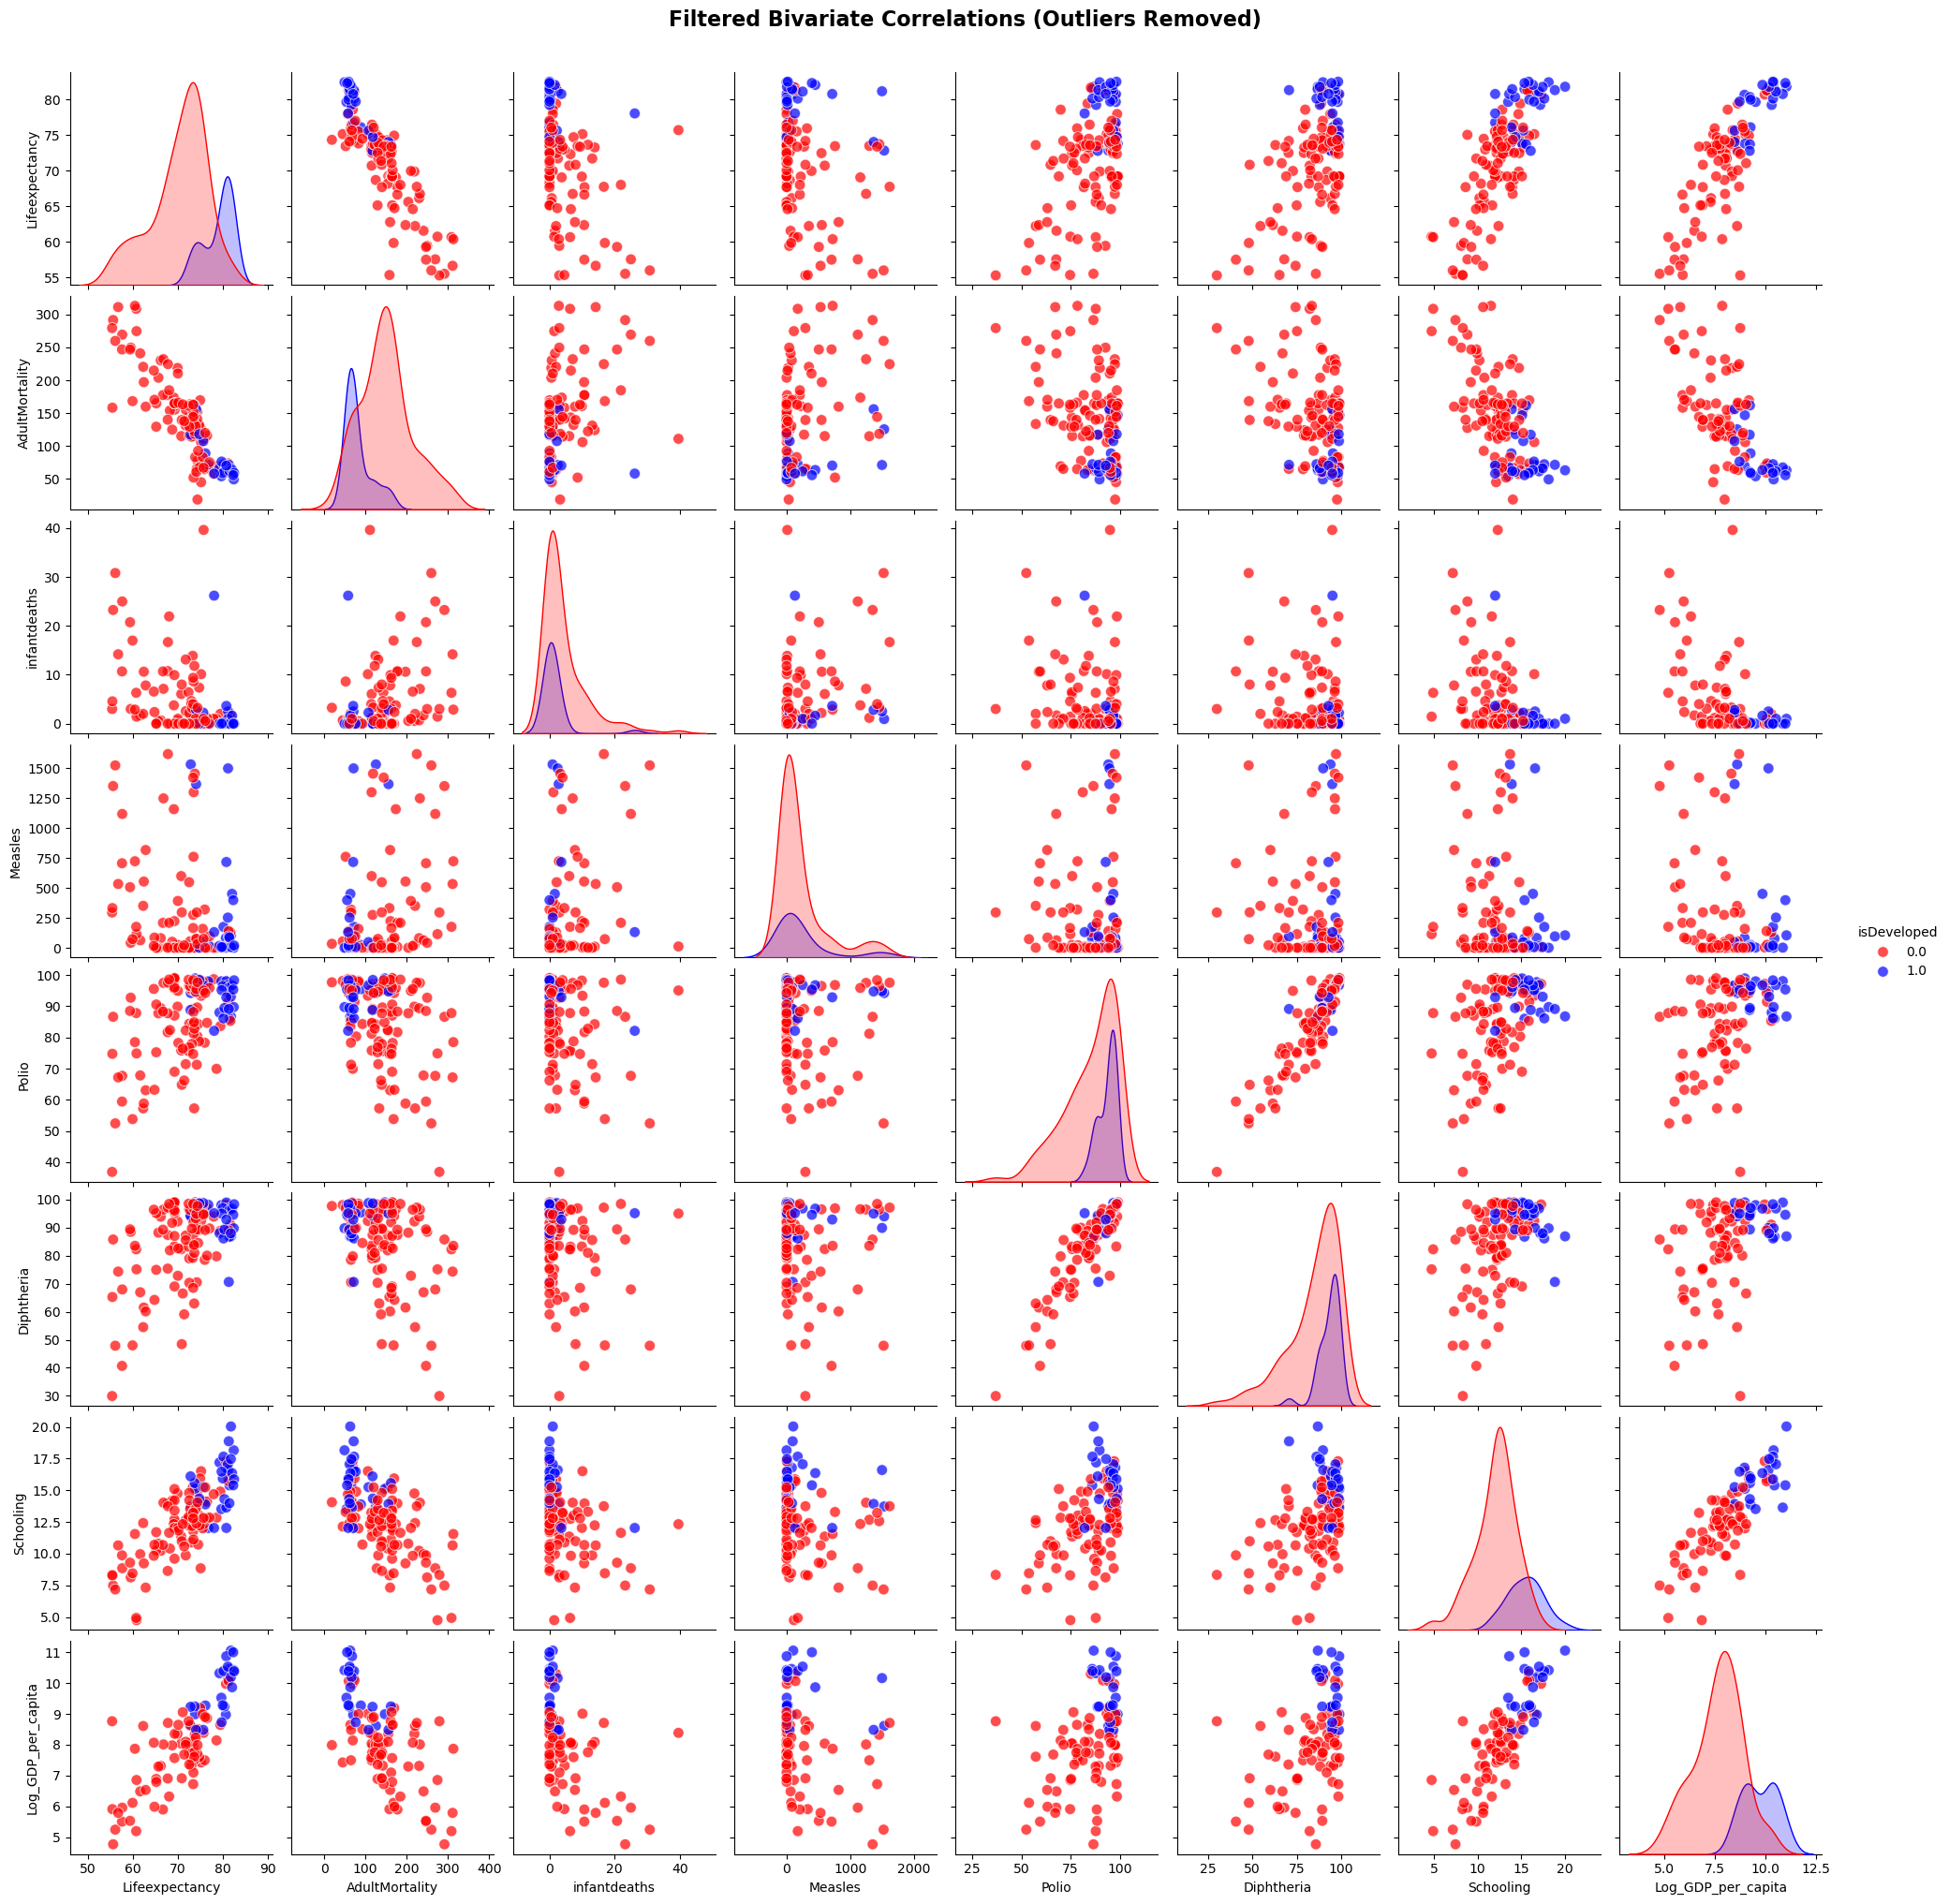

In [69]:
print("\n Final Filtered Pairplot: Clearer Correlations ")

# Create the final pairplot using the filtered DataFrame
sns.pairplot(
    dfLE_filtered,
    vars=cols_to_correlate,
    hue='isDeveloped',
    diag_kind='kde',
    palette={1:'blue', 0: 'red'},
    plot_kws={'alpha': 0.7, 's': 70}
)
plt.suptitle('Filtered Bivariate Correlations (Outliers Removed)', y=1.02, fontsize=16, fontweight='bold')
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [ ]:


# Data Preparation and Filtering 

try:
    dfLE = pd.read_csv("led.csv")
except FileNotFoundError:
    print("ERROR: 'led.csv' not found. Please place the file in the current directory and run the code again.")
    # Exiting execution for clarity.
    exit()

# Initial Cleaning
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE = dfLE.fillna(dfLE.mean(numeric_only=True))

# Calculate Log-GDP_per_capita
dfLE['GDP_per_capita'] = dfLE['GDP'] / dfLE['Population']
dfLE['Log_GDP_per_capita'] = np.log(dfLE['GDP_per_capita'])

# Outlier Filtering
dfLE_filtered = dfLE.copy()
outlier_cols = ['infantdeaths', 'Measles', 'AdultMortality']
for col in outlier_cols:
    Q1 = dfLE_filtered[col].quantile(0.25)
    Q3 = dfLE_filtered[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_fence = Q3 + 1.5 * IQR
    dfLE_filtered = dfLE_filtered[dfLE_filtered[col] <= upper_fence]

# Select numerical columns for correlation calculation
corr_cols = [
    'Lifeexpectancy',
    'AdultMortality',
    'infantdeaths',
    'Measles',
    'Polio',
    'Diphtheria',
    'Schooling',
    'Log_GDP_per_capita'
]

# Separate the filtered DataFrame into Developed and Developing groups
df_developed = dfLE_filtered[dfLE_filtered['isDeveloped'] == 1][corr_cols]
df_developing = dfLE_filtered[dfLE_filtered['isDeveloped'] == 0][corr_cols]

# Calculate correlations with Lifeexpectancy, sorted by absolute value
corr_dev = df_developed.corr()
corr_dev_life = corr_dev['Lifeexpectancy'].sort_values(key=np.abs, ascending=False).drop('Lifeexpectancy')

corr_dev_ing = df_developing.corr()
corr_dev_ing_life = corr_dev_ing['Lifeexpectancy'].sort_values(key=np.abs, ascending=False).drop('Lifeexpectancy')


# Display Results

print("Top 3 Strongest Correlations with Life Expectancy (Absolute Value)")

print("\nDeveloped Countries (isDeveloped = 1):")
print(corr_dev_life.nlargest(3).to_string())

print("\nDeveloping Countries (isDeveloped = 0):")
print(corr_dev_ing_life.nlargest(3).to_string())

Top 3 Strongest Correlations with Life Expectancy (Absolute Value)

Developed Countries (isDeveloped = 1):
Log_GDP_per_capita    0.727499
Schooling             0.388209
infantdeaths         -0.070908

Developing Countries (isDeveloped = 0):
Log_GDP_per_capita    0.742658
Schooling             0.740836
Diphtheria            0.525830


C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\3808732370.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\3808732370.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [ ]:
df_Dev = dfLE[dfLE["isDeveloped"] == 1]
df_notDev = dfLE[dfLE["isDeveloped"] == 0]
df_Dev.drop(columns={"isDeveloped", "Country"}, inplace=True)
df_notDev.drop(columns={"isDeveloped", "Country"}, inplace=True)
df_Dev.reset_index(drop=True, inplace=True)
df_notDev.reset_index(drop=True, inplace=True)

# To analyze the correlations and whether they are supported by reality or not.

print("\n" + "="*80)
print("SUBSTANTIALLY DIFFERENT RELATIONSHIPS")
print("="*80)

print("\n[A] Difference 1: Impact of GDP/Wealth (Log_GDP_per_capita)")
print("------------------------------------------------------------------")
print("RELATIONSHIP: The correlation between Life Expectancy and Log_GDP_per_capita is MUCH STRONGER in Developing countries than in Developed ones.")
print("THEORY: This reflects the law of DIMINISHING RETURNS. In Developing countries, the first dollar of wealth buys basic survival resources (vaccines, sanitation), leading to large gains in LE. In Developed countries, additional wealth buys high-cost marginal benefits, leading to weaker gains.")
print("CONFIRMATION: Perform a SEPARATE REGRESSION ANALYSIS for each group and compare the slope and R² value for Log_GDP_per_capita.")

print("\n[B] Difference 2: Impact of Preventable Diseases (Measles, Diphtheria, etc.)")
print("-----------------------------------------------------------------------------")
print("RELATIONSHIP: The NEGATIVE correlation between Life Expectancy and Preventable Disease counts (like Measles) is STRONGER in Developing countries.")
print("THEORY: In Developing countries, variations in disease counts directly signal a failing public health infrastructure and contribute significantly to mortality. In Developed countries, disease is highly contained, so variations have little statistical impact on national LE.")
print("CONFIRMATION: Use a TEST OF DIFFERENCE between two correlation coefficients (e.g., Fisher's Z-test) to confirm the correlations are statistically different between the two groups.")

print("\n" + "="*80)


SUBSTANTIALLY DIFFERENT RELATIONSHIPS

[A] Difference 1: Impact of GDP/Wealth (Log_GDP_per_capita)
------------------------------------------------------------------
RELATIONSHIP: The correlation between Life Expectancy and Log_GDP_per_capita is MUCH STRONGER in Developing countries than in Developed ones.
THEORY: This reflects the law of DIMINISHING RETURNS. In Developing countries, the first dollar of wealth buys basic survival resources (vaccines, sanitation), leading to large gains in LE. In Developed countries, additional wealth buys high-cost marginal benefits, leading to weaker gains.
CONFIRMATION: Perform a SEPARATE REGRESSION ANALYSIS for each group and compare the slope and R² value for Log_GDP_per_capita.

[B] Difference 2: Impact of Preventable Diseases (Measles, Diphtheria, etc.)
-----------------------------------------------------------------------------
RELATIONSHIP: The NEGATIVE correlation between Life Expectancy and Preventable Disease counts (like Measles) is STRON

C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\1580049651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Dev.drop(columns={"isDeveloped", "Country"}, inplace=True)
C:\Users\Jashanjot\AppData\Local\Temp\ipykernel_18148\1580049651.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_notDev.drop(columns={"isDeveloped", "Country"}, inplace=True)


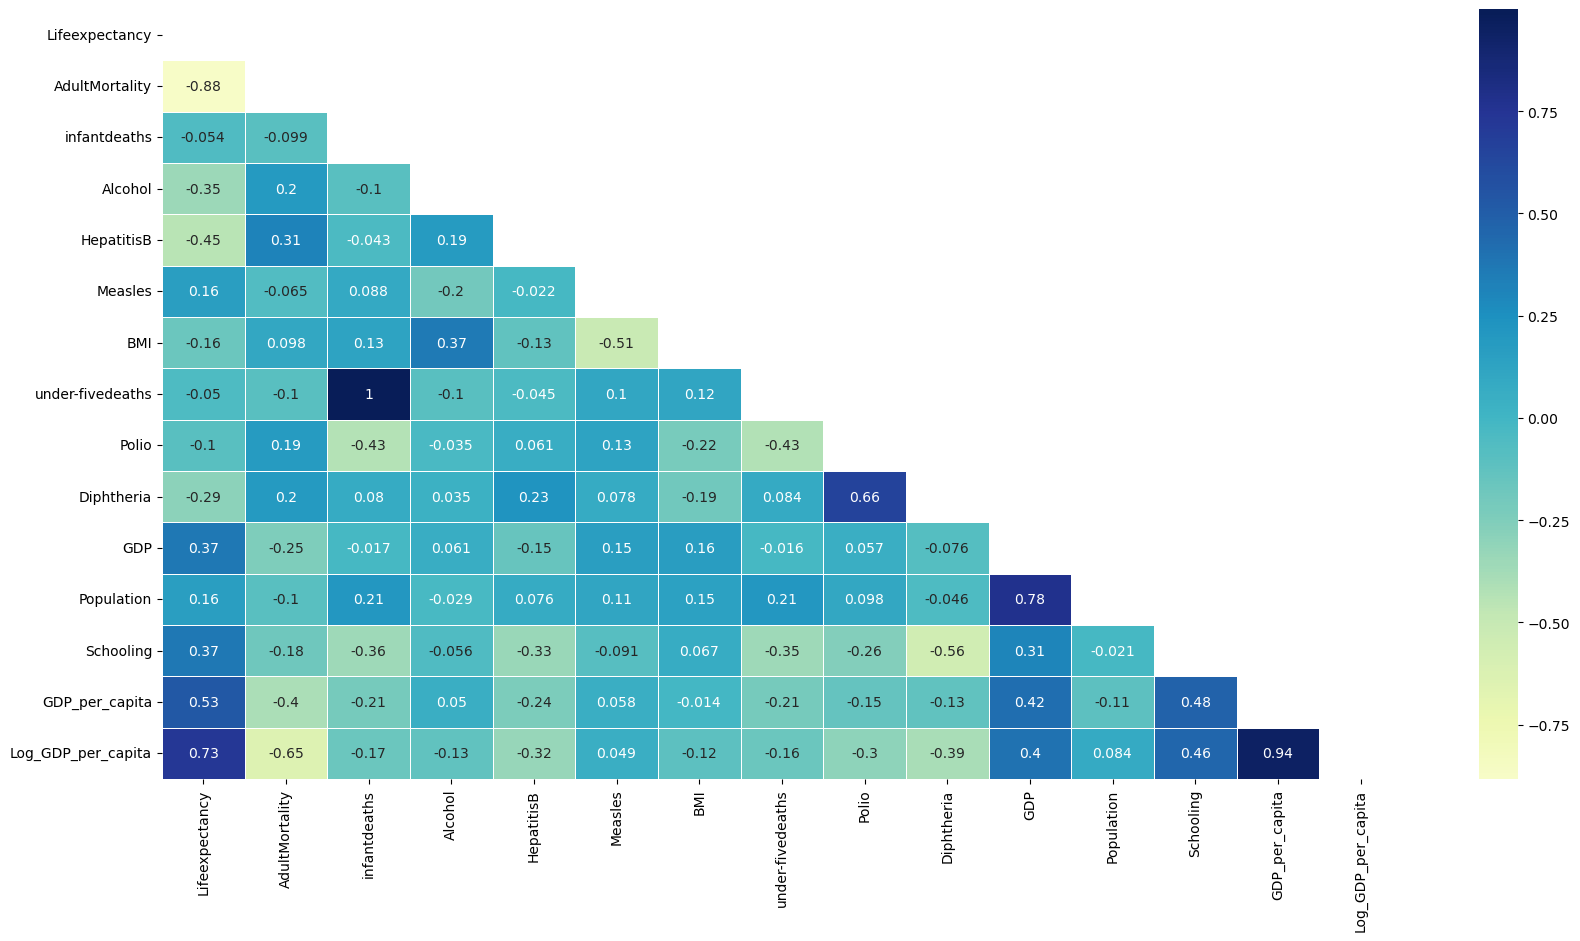

In [61]:
#Calculate correlations and analyze. 
##Show Correlations for Develooped DF in heatmap matrix using numpy library, seaborn and matplotlib
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df_Dev.corr(), dtype=bool))
sns.heatmap(df_Dev.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

